# Colon Disease Image Classification Model

In [1]:
#Importing nessecary packages
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import imageio.v2 as imageio
from pathlib import Path 
import seaborn as sns
import cv2
import glob
import skimage
from skimage.color import rgb2gray, gray2rgb
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization

## Data Exploration

In [2]:
#test image
def show_imgs(img_folder):
    for i in range(6):
        file = random.choice(os.listdir(img_folder))
        image_path= os.path.join(img_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,6,i+1)
        ax.title.set_text(file)
        plt.imshow(img)

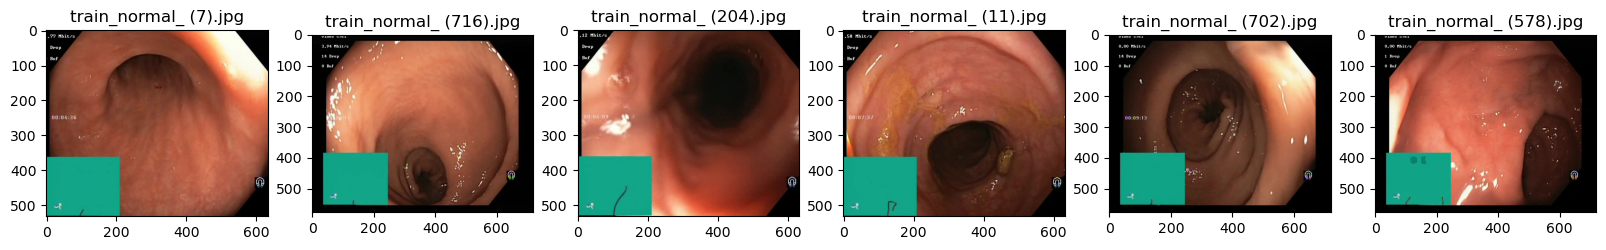

In [3]:
normal_train_folder=r'colon-image-data/train/0_normal'
plt.figure(figsize=(20, 20))
show_imgs(normal_train_folder)

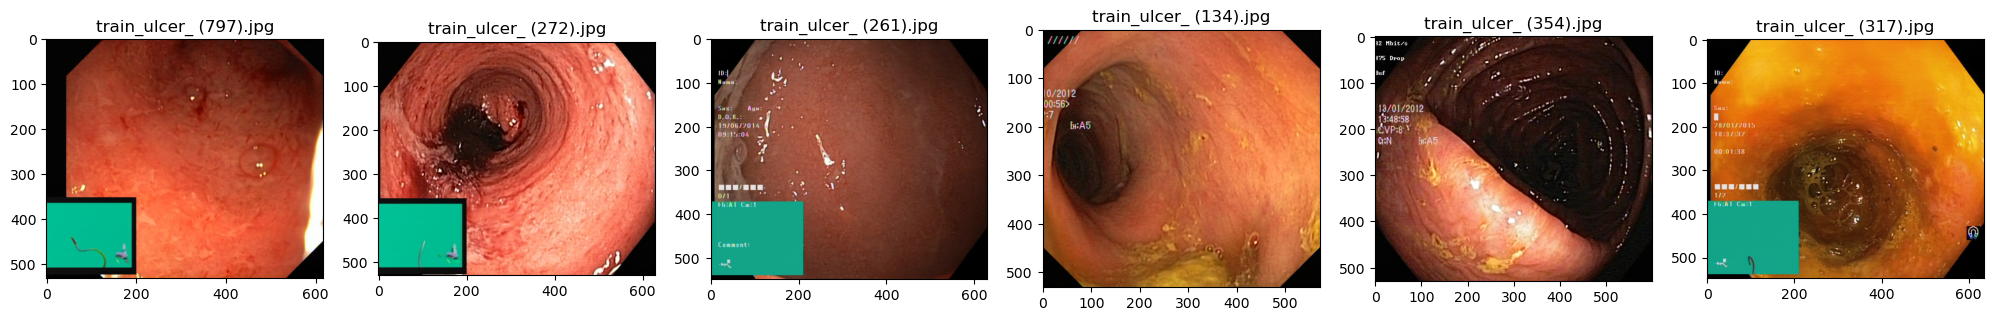

In [4]:
uc_train_folder=r'colon-image-data/train/1_ulcerative_colitis'
plt.figure(figsize=(25, 25))
show_imgs(uc_train_folder)

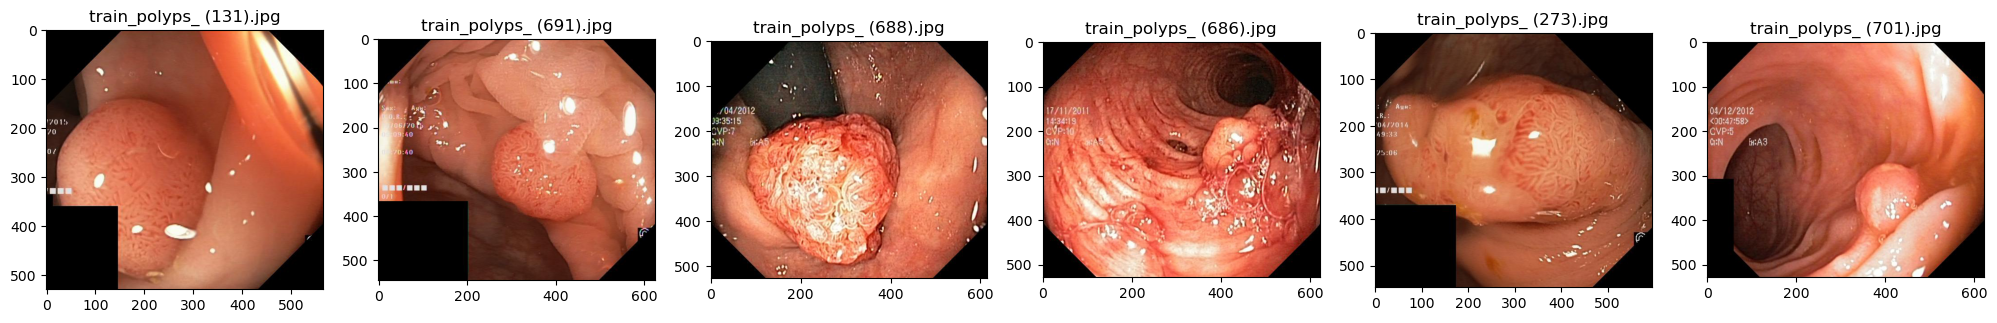

In [5]:
pol_train_folder=r'colon-image-data/train/2_polyps'
plt.figure(figsize=(25, 25))
show_imgs(pol_train_folder)

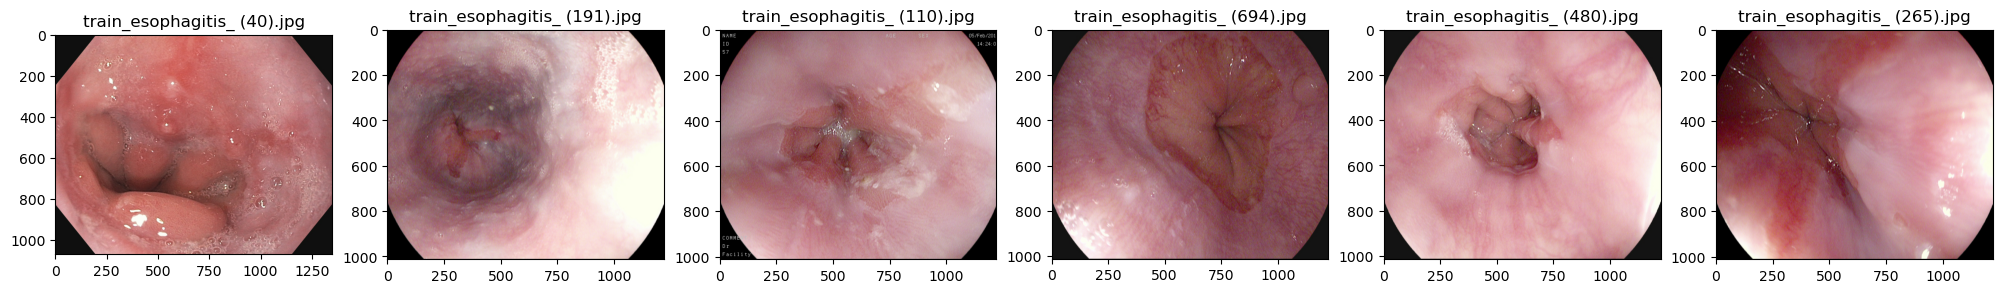

In [6]:
es_train_folder=r'colon-image-data/train/3_esophagitis'
plt.figure(figsize=(25, 25))
show_imgs(es_train_folder)

In [7]:
# Set the path dataset directory
train_path = 'colon-image-data/train/'
test_path = 'colon-image-data/test/'
val_path = 'colon-image-data/val/'
class_names = ['0_normal', 
                '1_ulcerative_colitis', 
                '2_polyps', 
                '3_esophagitis']

#### Train Data Frame

In [8]:
# iterate over files intrain path
files = Path(train_path).glob('*')
for file in files:
    print(file)

colon-image-data\train\0_normal
colon-image-data\train\1_ulcerative_colitis
colon-image-data\train\2_polyps
colon-image-data\train\3_esophagitis


In [9]:
normal_train_images = []
ulcerative_train_images = []
polyp_train_images = []
esophagitis_train_images = []
for images in glob.iglob(f'{normal_train_folder}/*'):
    if (images.endswith(".jpg")):
        normal_train_images.append(images)
for images in glob.iglob(f'{uc_train_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_train_images.append(images)
for images in glob.iglob(f'{pol_train_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_train_images.append(images)
for images in glob.iglob(f'{es_train_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_train_images.append(images)

In [10]:
train_df = pd.DataFrame({'normal':normal_train_images,'ulcerative':ulcerative_train_images,
                          'polyp':polyp_train_images,'esophagitis':esophagitis_train_images})

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       800 non-null    object
 1   ulcerative   800 non-null    object
 2   polyp        800 non-null    object
 3   esophagitis  800 non-null    object
dtypes: object(4)
memory usage: 25.1+ KB


<AxesSubplot:>

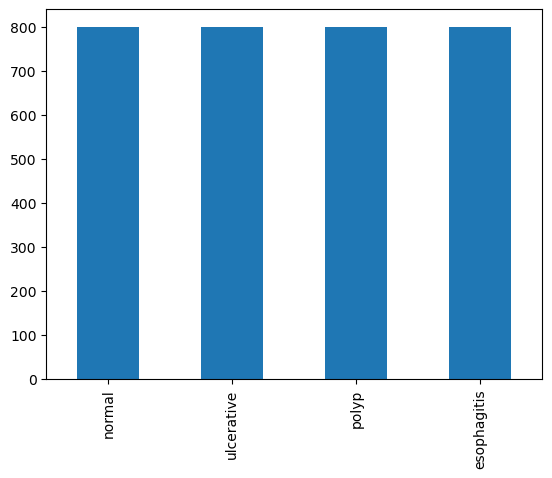

In [12]:
train_df.notnull().sum().plot(kind='bar')

#### Test Dataframe

In [13]:
# iterate over files in test path
files = Path(test_path).glob('*')
for file in files:
    print(file)

colon-image-data\test\0_normal
colon-image-data\test\1_ulcerative_colitis
colon-image-data\test\2_polyps
colon-image-data\test\3_esophagitis


In [14]:
normal_test_folder = 'colon-image-data/test/0_normal'
uc_test_folder = 'colon-image-data/test/1_ulcerative_colitis'
pol_test_folder = 'colon-image-data/test/2_polyps'
es_test_folder = 'colon-image-data/test/3_esophagitis'

In [15]:
normal_test_images = []
ulcerative_test_images = []
polyp_test_images = []
esophagitis_test_images = []
for images in glob.iglob(f'{normal_test_folder}/*'):
    if (images.endswith(".jpg")):
        normal_test_images.append(images)
for images in glob.iglob(f'{uc_test_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_test_images.append(images)
for images in glob.iglob(f'{pol_test_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_test_images.append(images)
for images in glob.iglob(f'{es_test_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_test_images.append(images)

In [16]:
test_df = pd.DataFrame({'normal':normal_test_images,'ulcerative':ulcerative_test_images,
                          'polyp':polyp_test_images,'esophagitis':esophagitis_test_images})

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       200 non-null    object
 1   ulcerative   200 non-null    object
 2   polyp        200 non-null    object
 3   esophagitis  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


<AxesSubplot:>

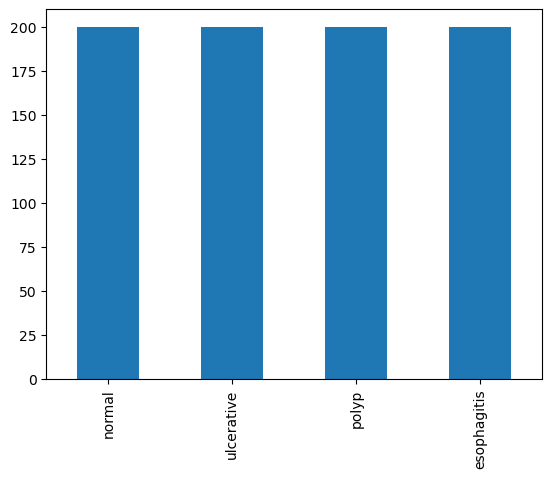

In [18]:
test_df.notnull().sum().plot(kind='bar')

#### Validation DataFrame

In [19]:
# iterate over files intrain path
files = Path(val_path).glob('*')
for file in files:
    print(file)

colon-image-data\val\0_normal
colon-image-data\val\1_ulcerative_colitis
colon-image-data\val\2_polyps
colon-image-data\val\3_esophagitis


In [20]:
normal_val_folder = 'colon-image-data/val/0_normal'
uc_val_folder = 'colon-image-data/val/1_ulcerative_colitis'
pol_val_folder = 'colon-image-data/val/2_polyps'
es_val_folder = 'colon-image-data/val/3_esophagitis'

In [21]:
normal_val_images = []
ulcerative_val_images = []
polyp_val_images = []
esophagitis_val_images = []
for images in glob.iglob(f'{normal_val_folder}/*'):
    if (images.endswith(".jpg")):
        normal_val_images.append(images)
for images in glob.iglob(f'{uc_val_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_val_images.append(images)
for images in glob.iglob(f'{pol_val_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_val_images.append(images)
for images in glob.iglob(f'{es_val_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_val_images.append(images)

In [22]:
val_df = pd.DataFrame({'normal':normal_val_images,'ulcerative':ulcerative_val_images,
                          'polyp':polyp_val_images,'esophagitis':esophagitis_val_images})

In [23]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       500 non-null    object
 1   ulcerative   500 non-null    object
 2   polyp        500 non-null    object
 3   esophagitis  500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


<AxesSubplot:>

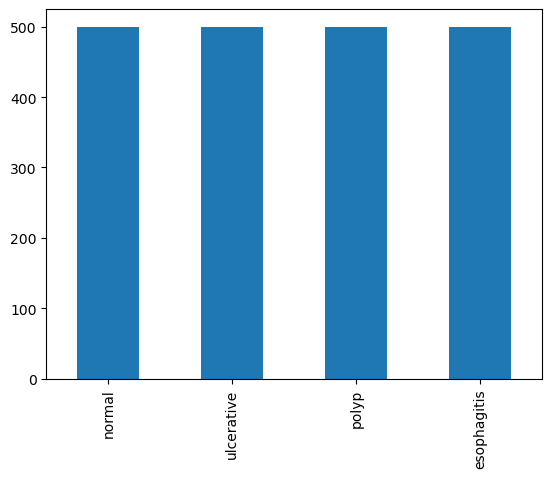

In [24]:
val_df.notnull().sum().plot(kind='bar')

## Normalization

In [25]:
# being with test image
#define normalization function (using 255 since pixel ranges are from 0 to 255)
def normalize(img):
    immin=float(img.min())
    immax=float(img.max())
    return np.floor((img-immin)/(immax-immin)*255)

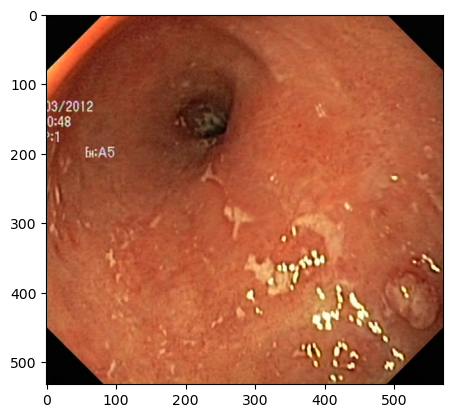

In [26]:
img = plt.imread(r'colon-image-data/train/1_ulcerative_colitis/train_ulcer_ (120).jpg')
plt.imshow(img.astype('uint8'))

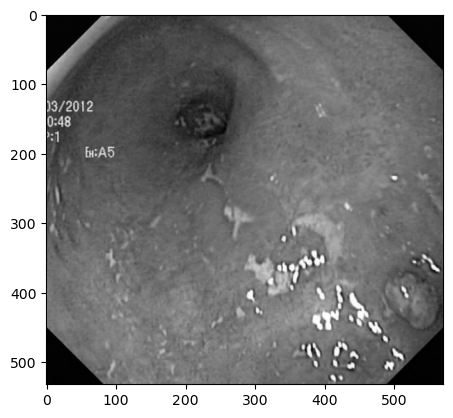

In [27]:
gray_img = skimage.color.rgb2gray(img)
plt.imshow(gray_img, cmap = 'gray')

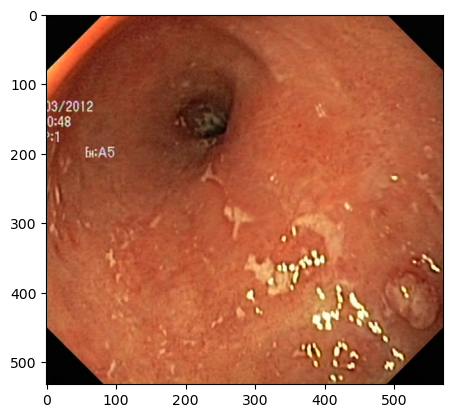

In [28]:
n_img = normalize(img)
plt.imshow(n_img.astype('uint8'))

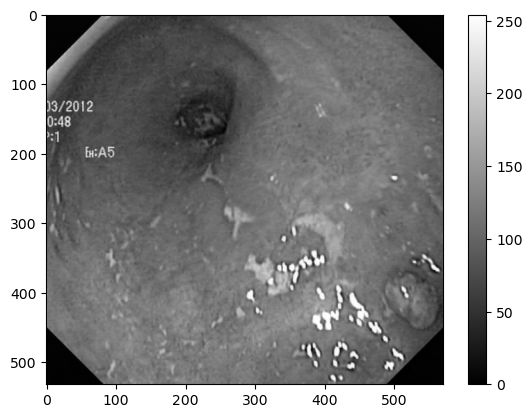

In [29]:
gray_nimg = skimage.color.rgb2gray(n_img)
plt.imshow(gray_nimg, cmap = 'gray')
plt.colorbar()


In [30]:
print(img-n_img)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [31]:
print(gray_img-gray_nimg)

[[-3.98431373 -3.98431373 -3.98431373 ... -4.98039216 -3.98431373
  -3.98431373]
 [-2.98823529 -2.98823529 -2.98823529 ... -3.98431373 -3.98431373
  -3.98431373]
 [-2.98823529 -2.98823529 -2.98823529 ... -2.98823529 -2.98823529
  -2.98823529]
 ...
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]]


In [32]:
from os.path import isfile,join
path = 'colon-image-data/train/' # Source Folder
dstpath = 'colon-image-data/train2/' # Destination Folder
files = list(filter(lambda f: isfile(join(path,f)), os.listdir(path)))
for image in files:
        img=cv2.imread(file)
        gray_img = skimage.color.rgb2gray(img)
        normalized_img = normalize(gray_img)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,normalized_img)

In [33]:
#actual normalization in this model will be applied with keras

### Processing using Tensorflow keras

In [34]:
#scaling performed by deviding by 255
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   fill_mode='constant')
                                
val_datagen = ImageDataGenerator(rescale = 1. / 255,fill_mode='constant')
test_datagen = ImageDataGenerator(rescale = 1. / 255,fill_mode='constant')

train_gen = train_datagen.flow_from_directory(
        train_path,
        class_mode='categorical',
        seed=42,
        classes=class_names)

val_gen = val_datagen.flow_from_directory(
        val_path,
        class_mode='categorical',
        seed=42,
        classes=class_names)

test_gen = test_datagen.flow_from_directory(
        test_path,
        class_mode='categorical',
        seed=42,
        classes=class_names)

#print samples per class
train_quant = len(train_gen.filenames)
val_quant = len(val_gen.filenames)
test_quant = len(test_gen.filenames)

print("Train samples:", train_quant)
print("Validation samples:", val_quant)
print("Test samples:", test_quant)

#check the class indices
train_gen.class_indices
val_gen.class_indices
test_gen.class_indices

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Train samples: 3200
Validation samples: 2000
Test samples: 800


{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

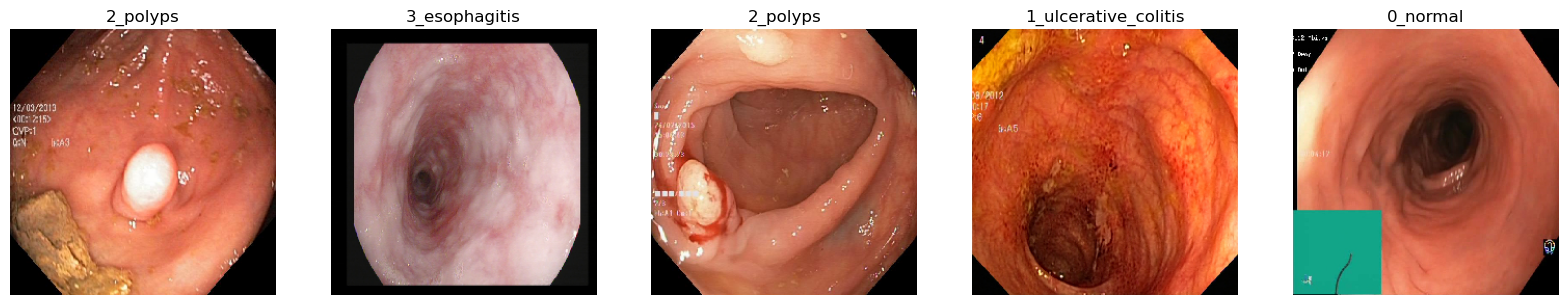

In [35]:
def image_samples(gen ):
    x_dict=gen.class_indices
    classes=list(x_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=5
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i]       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name)
        plt.axis('off')
    plt.show()
    
image_samples(train_gen)

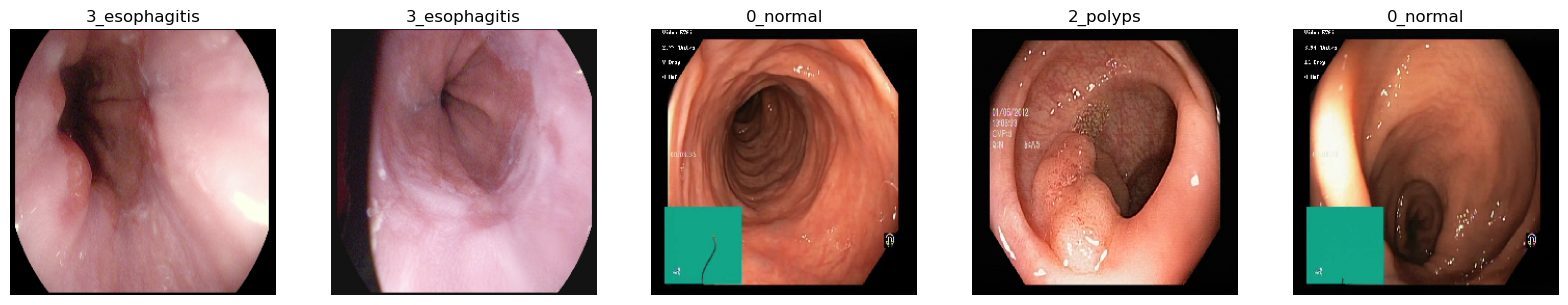

In [36]:
image_samples(test_gen)

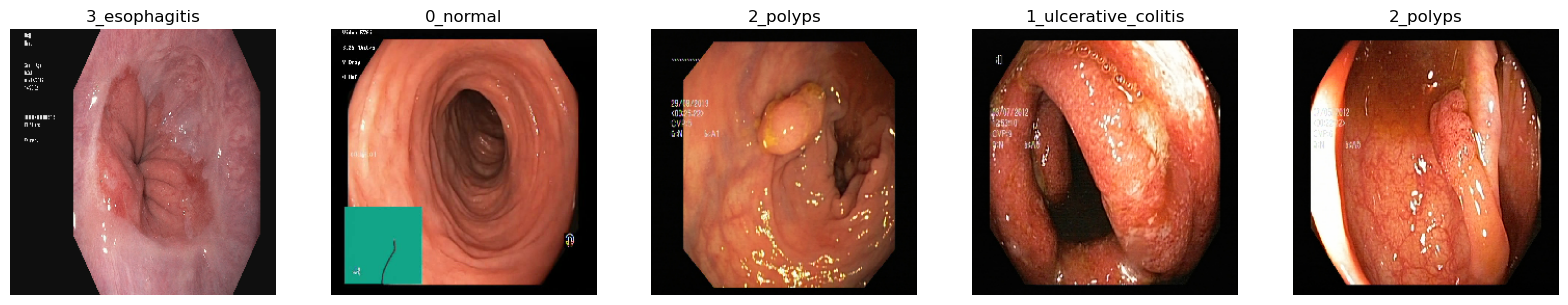

In [37]:
image_samples(val_gen)

## Building model

In [38]:
#this application from tensorflow uses pretrained weights on images
data_model = tf.keras.applications.EfficientNetB2(tf.keras.applications.efficientnet.EfficientNetB2(weights='imagenet',
    input_shape=(260,260,3)))

In [39]:
model = Sequential()
model.add(data_model)
model.add(BatchNormalization())
model.add(tf.keras.layers.Rescaling(1./255, 3)),
model.add(Flatten()),
model.add(Dense(128, activation='relu'))


In [40]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model_train = model.fit(train_gen, steps_per_epoch=len(train_gen),
  validation_data=val_gen, validation_steps=len(val_gen),
  epochs=1,verbose=1)

InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs' defined at (most recent call last):
    File "C:\Users\jdgarc17\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\jdgarc17\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\jdgarc17\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\jdgarc17\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\jdgarc17\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\jdgarc17\AppData\Local\Temp\ipykernel_17816\294562636.py", line 1, in <module>
      model_train = model.fit(x=train_gen, steps_per_epoch=len(train_gen),
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\jdgarc17\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs'
Incompatible shapes: [32,4] vs. [32,128]
	 [[{{node gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_34195]